# Nelder-mead algorithm

In [1]:
import numpy as np
%matplotlib inline 
from IPython.core.display import display
from sympy import *
import matplotlib.figure
init_printing()
#from math import *
from interval import interval
from interval import imath
import sys
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
from  matplotlib.tri import Triangulation
import random

from ivmat import ivmat as ip

from krawczyk import Krawczyk

In [2]:
args = x_1, x_2 = var("x_1 x_2")
f_expr = 0.6*exp(-4*(x_1-2*x_2)**2 - 6*(x_2-0.5)**2) + exp(-7*(cos(2*x_1) - (x_1 - sin(x_2)))**2 - 9*(0.9*cos(x_2))**2)
f = lambdify([args], -f_expr, modules=np)



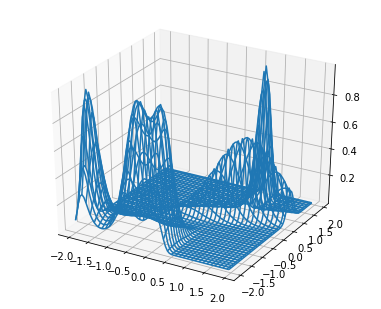

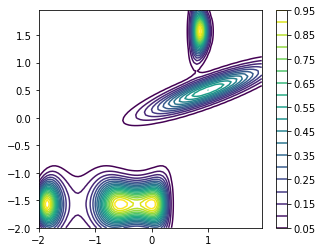

In [3]:
x = np.arange(-2, 2, 0.05) 
y = np.arange(-2, 2, 0.05) 

X, Y = np.meshgrid(x, y)
args_list =  np.array([X.flatten(), Y.flatten()]).T[:, :, np.newaxis].tolist()
Z = np.array([-f(_args) for _args in args_list]).reshape(X.shape)

fig = plt.figure(figsize=(5,4))
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z) 
plt.show()

fig = plt.figure(figsize=(5,4))
im =plt.contour(X, Y, Z, 20, shading='gouraud')
fig.colorbar(im)

## 最大値を求めたい

In [4]:
class NelderMead():
    """
        minimize func
    """
    def __init__(self, func, points, alpha=1, gamma=2, rho=0.5, sigma=0.5):
        self.func = func 
        self.points = points
        self.alpha = alpha
        self.gamma = gamma
        self.rho = rho
        self.sigma = sigma

    @property
    def x_o(self): # centroid(重心)
        return np.mean(self.points[:-1], axis=0)
    
    @property
    def x_r(self):
        x_r = self.x_o + self.alpha * (self.x_o - self.points[-1])
        return x_r  
    
    @property
    def x_e(self):
        x_e = self.x_o + self.gamma * (self.x_r - self.x_o)
        return x_e
    
    @property
    def x_c(self):
        x_c = self.x_o + self.rho * (self.x_o - self.points[-1])
        return x_c
    
    @property 
    def points(self):
        return self.points
    
    def reflection(self):
        self.points[-1] = self.x_r
        
    def expansion(self):
        if self.func(self.x_e) < self.func(self.x_r):
            self.points[-1] = self.x_e
        else:
            self.points[-1] = self.x_r
    
    def contraction_and_shrink(self):
        if self.func(self.x_c) < self.func(self.points[-1]):
            self.points[-1] = self.x_c
        else:
            self.points = self.points[0] + self.sigma * (self.points - self.points[0])
            
    def sort_points(self):
        self.points = np.array(sorted(self.points, key=lambda x: self.func(x)))
        return self.points
    
    def update_points(self): # 1回更新する
        self.sort_points()
        if self.func(self.points[0]) <= self.func(self.x_r) < self.func(self.points[-1]):
            self.reflection()
        elif self.func(self.x_r) < self.func(self.points[0]):
            self.expansion()
        else:
            self.contraction_and_shrink()
        return self.points
        

In [5]:
def generate_poins(x_1, x_2):
    return np.array([[x_1, x_2], [x_1+1, x_2], [x_1, x_2+1]])

def random_points(seed_num, low, higt):
    return np.random.uniform(low=low, high=high, size=(3,2))

def save_fig(X,Y,Z, points, filepath, title):
    fig = plt.figure(figsize=(8,8))
    im =plt.contour(X, Y, Z, 20, alpha=0.55, zorder=-1, shading='gouraud')
    triang=  matplotlib.tri.Triangulation(*points.T)
    plt.triplot(triang, 'bo-')
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    plt.title(title)
    fig.savefig(filepath)
    plt.close(fig)
    
def show_fig(X,Y,Z,points):
    fig = plt.figure(figsize=(4,4))
    im =plt.contour(X, Y, Z, 30, alpha=0.55, zorder=-1, shading='gouraud')
    triang=  matplotlib.tri.Triangulation(*points.T)
    plt.triplot(triang, 'bo-')
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    plt.show()
    plt.close(fig)

[[-0.73362121 -1.20793777]
 [ 0.95676982 -0.93857219]
 [ 0.93103267 -1.8634136 ]]


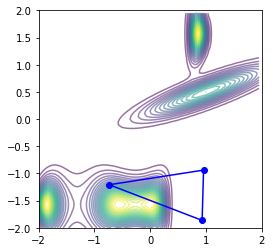

In [6]:
seed_num = 4256
np.random.seed(seed_num)
low = -2.5
high = 2.5
points = np.random.uniform(low=low, high=high, size=(3,2))
print points
show_fig(X,Y,Z, points)

In [7]:
nelder = NelderMead(f, points)
path_format = 'nelder_mead_image/nelder_{0:0>3}.png'
save_fig(X,Y,Z, nelder.points, path_format.format(0), 'cnt = 0')
iter_num = 30

for i in range(1, iter_num+1):
    nelder.update_points()
    title = 'cnt = {}, seed={}, low={}, high={}'.format(i, seed_num, low, high)
    save_fig(X,Y,Z, nelder.points, path_format.format(i), title)